First, import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

load the data from the supplied excel data file and see the sheetnames available

In [2]:
data = pd.ExcelFile('ASDHD - Health and Care Experience Survey - 2017 -     Variations Analysis -....xls')
data.sheet_names

['Gender',
 'Age',
 'Ethnicity',
 'Religion',
 'Sexual Orientation',
 'Deprivation',
 'Urban Rural',
 'Work Status',
 'Carers',
 'Health Status',
 'Day to day Activities',
 'Interpreter',
 'Long-term Condition',
 'GP Practice Size',
 '% List in Deprived Areas',
 'Freq. Contact',
 'OOH - First Service',
 'OOH - Last Service']

Our group got a Excel file with 18 sheets, we decide that every one of us take 6 sheets. My part is the last 6 sheets and after looking at the data, I choose "GP Practice Size" to do my assignment2.

# Cleaning

First choose "GP Practice Size" sheet. With observing the sheet, we can see the first two rows are description for the sheet, so when reading the data, we can just skip the first two rows.

In [3]:
df_GPSize = pd.read_excel(data, 'GP Practice Size',skiprows=2)  
df_GPSize.head(10)

,Theme,Question,"< 2,500","5,000 - 7,499","7,500 - 9,999","10,000+",COL1,COL2,COL3,COL4
0,Access,Thinking of the last time you contacted this G...,3.750,0.484,0.356,0.363,+,-,-,-
1,Access,NaN,"(2.958 ,4.754)","(0.395 ,0.594)","(0.283 ,0.449)","(0.279 ,0.472)",+,-,-,-
2,Access,"The last time you phoned the GP surgery, how h...",1.962,0.668,0.558,0.521,+,-,-,-
3,Access,NaN,"(1.619 ,2.378)","(0.574 ,0.778)","(0.471 ,0.661)","(0.430 ,0.631)",+,-,-,-
4,Access,The last time you needed to see or speak to a ...,2.166,0.859,0.766,0.653,+,-,-,-
5,Access,NaN,"(1.865 ,2.517)","(0.756 ,0.977)","(0.663 ,0.884)","(0.555 ,0.770)",+,-,-,-
6,Access,If you ask to make an appointment with a docto...,2.281,0.473,0.425,0.531,+,-,-,-
7,Access,NaN,"(1.810 ,2.875)","(0.384 ,0.583)","(0.336 ,0.537)","(0.406 ,0.695)",+,-,-,-
8,Access,When you arrange to see a doctor at your GP su...,2.395,0.510,0.425,0.370,+,-,-,-
9,Access,NaN,"(2.005 ,2.861)","(0.438 ,0.593)","(0.358 ,0.504)","(0.304 ,0.449)",+,-,-,-


In this sheet,each even row shows the odds ratio for specific question and the odd row shows the confidence interval for the odds ratio. Also, the columns "COL1","COL2","COL3" and "COL4" show whether there is significant association in different groups, with "+"(odd ratio>1,confidence interval >1) means positive association, "-"(odds ratio<1, confidence interval <1) means negative association and "N"(confidece interval includes 1) means there is no association. The value of the odds ratio indicates the strength of the association.

I split the odd and even rows into different dataframe(df_GPSize_OR and df_GPSize_ORConfidence) and concentrate on the odds ratio one because with "COL1" "COL2" "COL3" and "COL4" we can still have the information about confidence interval

In [4]:
df_GPSize_OR = df_GPSize.iloc[0::2, :] 
df_GPSize_ORConfidence = df_GPSize.iloc[1::2, :]
df_GPSize_OR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 54
Data columns (total 10 columns):
Theme            28 non-null object
Question         28 non-null object
< 2,500          28 non-null object
5,000 - 7,499    28 non-null object
7,500 - 9,999    28 non-null object
10,000+          28 non-null object
COL1             28 non-null object
COL2             28 non-null object
COL3             28 non-null object
COL4             28 non-null object
dtypes: object(10)
memory usage: 2.3+ KB


From the structure of the data, we can see all of them are the "object" type now, so I need to change some columns' data type to float with the df.apply() and pd.to_numeric function,

In [5]:
df_GPSize_OR.reset_index(drop=True,inplace = True)
df_GPSize_OR=df_GPSize_OR.apply(pd.to_numeric, errors='ignore')
df_GPSize_OR.info()
df_GPSize_OR.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
Theme            28 non-null object
Question         28 non-null object
< 2,500          28 non-null float64
5,000 - 7,499    28 non-null float64
7,500 - 9,999    28 non-null float64
10,000+          28 non-null float64
COL1             28 non-null object
COL2             28 non-null object
COL3             28 non-null object
COL4             28 non-null object
dtypes: float64(4), object(6)
memory usage: 2.3+ KB


,Theme,Question,"< 2,500","5,000 - 7,499","7,500 - 9,999","10,000+",COL1,COL2,COL3,COL4
0,Access,Thinking of the last time you contacted this G...,3.750,0.484,0.356,0.363,+,-,-,-
1,Access,"The last time you phoned the GP surgery, how h...",1.962,0.668,0.558,0.521,+,-,-,-
2,Access,The last time you needed to see or speak to a ...,2.166,0.859,0.766,0.653,+,-,-,-
3,Access,If you ask to make an appointment with a docto...,2.281,0.473,0.425,0.531,+,-,-,-
4,Access,When you arrange to see a doctor at your GP su...,2.395,0.510,0.425,0.370,+,-,-,-


In [6]:
df_GPSize_OR.describe()

,"< 2,500","5,000 - 7,499","7,500 - 9,999","10,000+"
count,28.000000,28.000000,28.000000,28.000000
mean,1.582893,0.804964,0.714750,0.692214
std,0.602512,0.141613,0.154867,0.162202
min,1.053000,0.473000,0.356000,0.363000
25%,1.174750,0.764000,0.635250,0.593750
50%,1.354500,0.851000,0.768000,0.720000
75%,1.688250,0.916250,0.837750,0.825250
max,3.750000,0.958000,0.888000,0.917000


# Statistical Questions

How many rows and columns are in the dataset after cleaning?

In [7]:
df_GPSize_OR.shape

(28, 10)

For each group, how many questions can be considered as associated with the GP Practice Size? The proportion?  And how many report positive experience, how many report negative experience? 

In [8]:
df_2500 = df_GPSize_OR.loc[df_GPSize_OR['COL1']!='N']
print('For GP Practice Size smaller than 2500: ',df_2500.shape[0],',',df_2500.shape[0]/df_GPSize_OR.shape[0] )
print('Positive:', df_2500.loc[df_2500['< 2,500']>1].shape[0],' ','Negative:', df_2500.loc[df_2500['< 2,500']<1].shape[0])

df_5000 = df_GPSize_OR.loc[df_GPSize_OR['COL2']!='N']
print('For GP Practice Size in 5000-7499: ',df_5000.shape[0],',',df_5000.shape[0]/df_GPSize_OR.shape[0])
print('Positive:', df_5000.loc[df_5000['5,000 - 7,499']>1].shape[0],' ','Negative:', df_5000.loc[df_5000['5,000 - 7,499']<1].shape[0])

df_7500 = df_GPSize_OR.loc[df_GPSize_OR['COL3']!='N']
print('For GP Practice Size in 7500-9999: ',df_7500.shape[0],',',df_7500.shape[0]/df_GPSize_OR.shape[0])
print('Positive:', df_7500.loc[df_7500['7,500 - 9,999']>1].shape[0],' ','Negative:', df_7500.loc[df_7500['7,500 - 9,999']<1].shape[0])

df_10000 = df_GPSize_OR.loc[df_GPSize_OR['COL4']!='N']
print('For GP Practice Size larger than 10000: ',df_10000.shape[0],',',df_10000.shape[0]/df_GPSize_OR.shape[0])
print('Positive:', df_10000.loc[df_10000['10,000+']>1].shape[0],' ','Negative:', df_10000.loc[df_10000['10,000+']<1].shape[0])


For GP Practice Size smaller than 2500:  24 , 0.8571428571428571
Positive: 24   Negative: 0
For GP Practice Size in 5000-7499:  21 , 0.75
Positive: 0   Negative: 21
For GP Practice Size in 7500-9999:  28 , 1.0
Positive: 0   Negative: 28
For GP Practice Size larger than 10000:  25 , 0.8928571428571429
Positive: 0   Negative: 25


Which group has the best experience? which group has the worst experience? 

In [9]:
meanVal = [np.mean(df_GPSize_OR['< 2,500']),np.mean(df_GPSize_OR['5,000 - 7,499']),np.mean(df_GPSize_OR['7,500 - 9,999']),np.mean(df_GPSize_OR['10,000+'])]
best = np.argmax(meanVal)
worst = np.argmin(meanVal)

#find the group has best experience
if best==0:
    print("the size smaller than 2500 has best experience")
elif best ==1:
    print("the size in 5000 - 7499 has best experience")
elif best == 2:
    print("the size in 7500 - 9999 has best experience")
else:
    print("the size larger than 10000 has best experience")
    
#find the group has the worst experience
if worst==0:
    print("the size smaller than 2500 has worst experience")
elif worst ==1:
    print("the size in 5000 - 7499 has worst experience")
elif worst == 2:
    print("the size in 7500 - 9999 has worst experience")
else:
    print("the size larger than 10000 has worst experience")

the size smaller than 2500 has best experience
the size larger than 10000 has worst experience


For different themes, are there difference for different groups?
First, calculate the mean value for each theme for each group and use a new dataframe to store the result

In [10]:
theme = df_GPSize_OR.Theme.unique()
df_theme = pd.DataFrame(columns=['Theme','< 2,500','5,000 - 7,499','7,500 - 9,999','10,000+'])
index=0
for item in theme:
    df = df_GPSize_OR.loc[df_GPSize_OR['Theme']==item]
    row = [item,np.mean(df['< 2,500']),np.mean(df['5,000 - 7,499']),np.mean(df['7,500 - 9,999']),np.mean(df['10,000+'])]
    df_theme.loc[index] = row
    index = index+1
df_theme


,Theme,"< 2,500","5,000 - 7,499","7,500 - 9,999","10,000+"
0,Access,2.377571,0.617286,0.517000,0.487714
1,Referrals,1.098000,0.932000,0.854000,0.841000
2,At your GP surgery,1.682333,0.776333,0.676667,0.672667
3,Doctor,1.297000,0.919000,0.837500,0.811500
4,Nurse,1.217000,0.878500,0.795167,0.738000
5,Care and treatment,1.053000,0.925000,0.886000,0.917000
6,Medicines,1.205800,0.911800,0.845800,0.856000
7,Overall care,1.518333,0.788000,0.649667,0.620333


Calculate each group has best experience and worst experience in which theme.

In [11]:
print('For GP Practice Size smaller than 2500:')
print ('Best experience in：',df_theme.Theme[df_theme['< 2,500'].idxmax],' ','worst experience in:',df_theme.Theme[df_theme['< 2,500'].idxmin])

print('For GP Practice Size in 5000-7499:')
print ('Best experience in：',df_theme.Theme[df_theme['5,000 - 7,499'].idxmax],' ','worst experience in:',df_theme.Theme[df_theme['5,000 - 7,499'].idxmin])

print('For GP Practice Size in 7500-9999:')
print ('Best experience in：',df_theme.Theme[df_theme['7,500 - 9,999'].idxmax],' ','worst experience in:',df_theme.Theme[df_theme['7,500 - 9,999'].idxmin])

print('For GP Practice Size larger than 10000:')
print ('Best experience in：',df_theme.Theme[df_theme['10,000+'].idxmax],' ','worst experience in:',df_theme.Theme[df_theme['10,000+'].idxmin])


For GP Practice Size smaller than 2500:
Best experience in： Access   worst experience in: Care and treatment
For GP Practice Size in 5000-7499:
Best experience in： Referrals   worst experience in: Access
For GP Practice Size in 7500-9999:
Best experience in： Care and treatment   worst experience in: Access
For GP Practice Size larger than 10000:
Best experience in： Care and treatment   worst experience in: Access


# Graphs

In [12]:
import scipy
from scipy import stats

import numpy as np
import seaborn as sns     
import matplotlib.pyplot as plt
%matplotlib inline 

What is the odds ratio distribution for each group?

[Text(0.5,0,'Odds Ratio')]

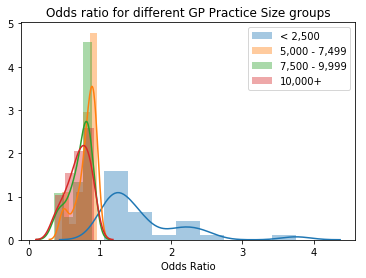

In [13]:

myChart = sns.distplot(df_GPSize_OR['< 2,500'],axlabel=False,label="< 2,500")
myChart = sns.distplot(df_GPSize_OR['5,000 - 7,499'],axlabel=False,label="5,000 - 7,499")

myChart = sns.distplot(df_GPSize_OR['7,500 - 9,999'],axlabel=False,label="7,500 - 9,999")

myChart = sns.distplot(df_GPSize_OR['10,000+'],axlabel=False,label="10,000+")


plt.legend()

myChart.set_title('Odds ratio for different GP Practice Size groups')
myChart.set(xlabel='Odds Ratio')


from statistical analysis, we know that when GR Practice size is smaller than 2500, for all questions, they have better experience than the base group while for other groups who have large GR Practice size, they all have worse experience. 
For this two kinds of groups(has better or worse experience), do they have the same trend for the same questions?

LinregressResult(slope=-3.67153478311371, intercept=4.53834723130714, rvalue=-0.8629479194745479, pvalue=3.4772904735760097e-09, stderr=0.4216184043417711)
LinregressResult(slope=-3.432692868225613, intercept=4.036410084707113, rvalue=-0.8823250421789793, pvalue=5.373514431946422e-10, stderr=0.3590947071089675)
LinregressResult(slope=-3.1608063813232383, intercept=3.770848188671679, rvalue=-0.8509211346650838, pvalue=9.662851990662171e-09, stderr=0.3826695498161458)


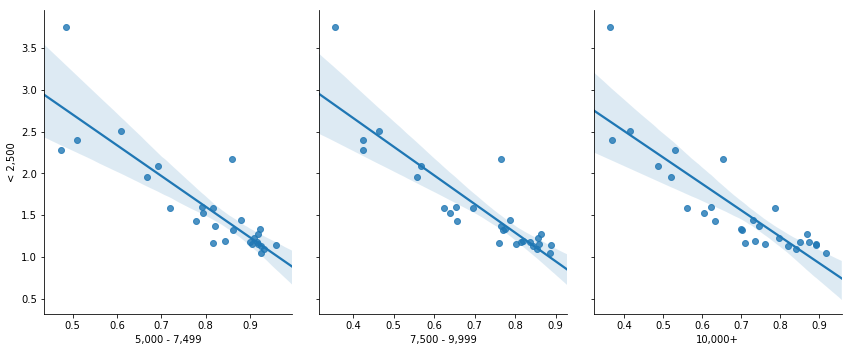

In [14]:
sns.pairplot(df_GPSize_OR, x_vars=["5,000 - 7,499", "7,500 - 9,999","10,000+"], y_vars=["< 2,500"],
             height=5, aspect=.8, kind="reg")
print(scipy.stats.linregress(df_GPSize_OR['5,000 - 7,499'],df_GPSize_OR['< 2,500']))
print(scipy.stats.linregress(df_GPSize_OR['7,500 - 9,999'],df_GPSize_OR['< 2,500']))
print(scipy.stats.linregress(df_GPSize_OR['10,000+'],df_GPSize_OR['< 2,500']))



From the above plot, it is surpringly that these two groups have opposite trend for the same question. When small size group have a better experience in one question compared to other question, the large size group has worse experience in this question compared to other question.

For each group, compare their experience in different themes.

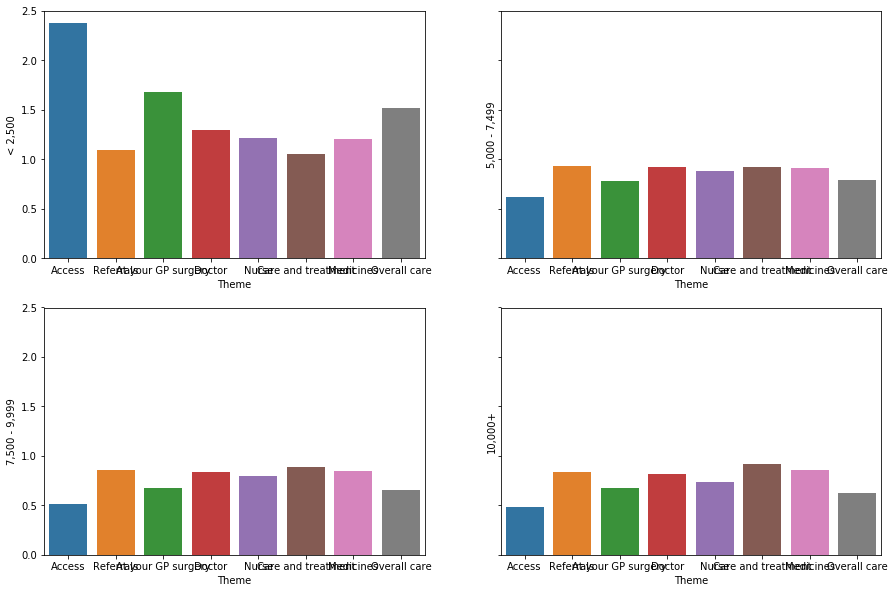

In [15]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
sns.barplot(x="Theme", y="< 2,500", data=df_theme,ax=axes[0, 0])
sns.barplot(x="Theme", y="5,000 - 7,499", data=df_theme,ax=axes[0, 1])
sns.barplot(x="Theme", y="7,500 - 9,999", data=df_theme,ax=axes[1, 0])
sns.barplot(x="Theme", y="10,000+", data=df_theme,ax=axes[1, 1])

For group size smaller than 2500 in which people overall have better experience, there is a strong experience difference in different themes while for group size larger than 5000 in which people overal have a worse experiencem, the experience difference between each theme is not that big.

Explore the trend in each theme with the group size grows

In [16]:
df_theme_transposed = df_theme.set_index('Theme').T.rename_axis('GroupSize').rename_axis(None, 1).reset_index()
df_theme_transposed

,GroupSize,Access,Referrals,At your GP surgery,Doctor,Nurse,Care and treatment,Medicines,Overall care
0,"< 2,500",2.377571,1.098,1.682333,1.2970,1.217000,1.053,1.2058,1.518333
1,"5,000 - 7,499",0.617286,0.932,0.776333,0.9190,0.878500,0.925,0.9118,0.788000
2,"7,500 - 9,999",0.517000,0.854,0.676667,0.8375,0.795167,0.886,0.8458,0.649667
3,"10,000+",0.487714,0.841,0.672667,0.8115,0.738000,0.917,0.8560,0.620333


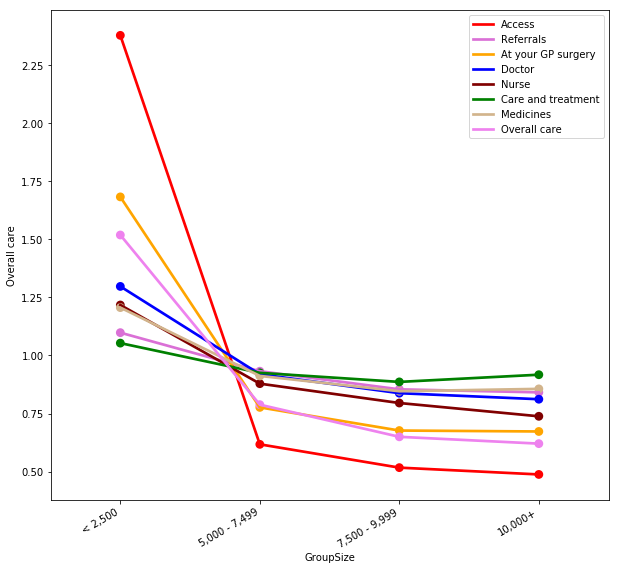

In [17]:
f, ax = plt.subplots(1, 1,figsize=(10, 10))
sns.pointplot(ax=ax,x="GroupSize", y="Access", data=df_theme_transposed,color="red")
sns.pointplot(ax=ax,x="GroupSize", y="Referrals", data=df_theme_transposed,color="orchid")
sns.pointplot(ax=ax,x="GroupSize", y="At your GP surgery", data=df_theme_transposed,color="orange")
sns.pointplot(ax=ax,x="GroupSize", y="Doctor", data=df_theme_transposed,color="blue")
sns.pointplot(ax=ax,x="GroupSize", y="Nurse", data=df_theme_transposed,color="maroon")
sns.pointplot(ax=ax,x="GroupSize", y="Care and treatment", data=df_theme_transposed,color="green")
sns.pointplot(ax=ax,x="GroupSize", y="Medicines", data=df_theme_transposed,color="tan")
sns.pointplot(ax=ax,x="GroupSize", y="Overall care", data=df_theme_transposed,color="violet")

ax.legend(handles=ax.lines[::len(df_theme_transposed)+1], labels=["Access","Referrals","At your GP surgery","Doctor","Nurse","Care and treatment","Medicines","Overall care"])
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.gcf().autofmt_xdate()

plt.show()

From the above graph, we can see that, overall with the group size grows, the experience gets worse. The biggest difference lies in "Acess". For "Care and treatment", the difference is very small in all four groups. When the group size >5000, the overall experience in the three groups have small difference.

# Reflection and Hypothesise

Reflection

Our data is a relatively clear data, the data holder has nicely analysed the raw data and gave us the final result of the survey. What they want us to do is to create an attractive data visualization for them to understand these good and bad aspects better. 
From the above analysis, I have some general conclusion for this, and I think this is related to what our data holder want because the audiences who may be the policy makers can improve the situation based on these findings.
1. In general, the larger the practice list, the less positive experiences that people had. 
2. The difference in experiences was greatest for questions that related to accessing GP services.

Before dealing with the data, I need to understand what the odds ratios is because I didn't know this before. Understanding the meaning of the data is a very significant part in every data analysis.

When dealing with the data, I spent a lot of time on cleaning the data because the Excel file we got has many redundant information and will make the analysing process rather difficult. After discoveing the relationship between the variables in the sheet, I can clean the data and make it easier to deal with.I think this may also be a interesting part for our data holder to know because it will help them organize the data better in the future.


Hypothesise

1. Part of the reason for people having less positive experiences at larger practices relates to difficulties in being able to make appointments. There was a notable difference in experiences between smaller and larger practices over being able to get through on the phone(Acess theme,answer for question1 in the sheet). Those at smaller practices were much more positive(>3). 
This finding may be due to smaller practices being better able to manage the volume of calls which will generally be lower. 
To test this hypothesise, I think we can first survey how much phone calls a practice can answer in a day and how many people will call the practice in a day. Survey this data in different practice with different size and see whether this hypothesise is true.

2.  Negative experiences around access in larger practices may be more to do with perceived lower levels of continuity of care where patients may be less likely to see the same doctor each time. People in smaller practices may report positive experiences because they are more likely to get to know the practice staff and so it will be easier for them to build good relationships. To test this hypothesise, we can give another survey about the relationships between patients and GP Practice to know how well the practice know about their registers and how well the registers know about their practice.

3. I think in "care and treatment" part, the difference is not that big in practice with different size can demostrate that the resources allocation for different practice is relatively equal. This is a good aspect about equality. To test this hypothesise, we can survey the education backgroud of the doctors and nurses, the medical equipments and the environment in different GP Practice. This will give us a more clear understanding about this hypothesise. 